In [1]:
file_path = r'C:\Users\USER\Desktop\my_tasks\Week_15\Kaggle proj\train.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def load_and_pda(file_path):
    """
    Loads dataset, performs basic PDA
    
    Steps:
    1. Load CSV file.
    2. Basic info 
    3. missing values
    4. Check for duplicates
    5. PDA by feature type
    """

    # === 1. Load dataset ===
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset loaded successfully: {file_path}")
        print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

    # === 2. Basic Info ===
    print("=== DATA INFO ===")
    print(df.info())
    print("\n=== FIRST 5 ROWS ===")
    print(df.head())
    print("\n=== LAST 5 ROWS ===")
    print(df.tail())
    print("\n=== SUMMARY STATISTICS ===")
    print(df.describe().T)

    # === 3. Missing Values ===
    print("\n=== MISSING VALUE PERCENTAGES ===")
    missing = df.isnull().mean() * 100
    print(missing[missing > 0].sort_values(ascending=False))


    # === 4. Check for duplicates
    print("\n2. Duplicate Rows:")
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    if duplicates > 0:
        print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")

    # === 5. PDA by Feature Type ===
    numerical = df.select_dtypes(include=['int64', 'float64']).columns
    categorical = df.select_dtypes(exclude=['int64', 'float64']).columns

    print(f"\nNumerical features: {list(numerical)}")
    print(f"Categorical features: {list(categorical)}")

    return df


In [3]:
df = load_and_pda(file_path)

Dataset loaded successfully: C:\Users\USER\Desktop\my_tasks\Week_15\Kaggle proj\train.csv
Shape: 593994 rows × 13 columns

=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back 

Data Quality Summary

The dataset appears clean and well-structured. There are no missing values, which means all records are complete and ready for analysis without additional imputation. Likewise, there are no duplicate rows, indicating that the data collection process was consistent and free from redundancy.

The dataset contains a mix of numerical features such as income, credit score, loan details, and repayment status and categorical features, including demographic and loan-purpose information. This balanced combination provides a solid foundation for both statistical analysis and predictive modeling.

Overall, the dataset is in good shape

In [4]:
def check_unique_values(df):
    """
    Prints the number of unique values and the unique entries
    for each column in the DataFrame.
    """
    for col in df.select_dtypes(include='object'):
        unique_vals = df[col].unique()
        print(f"\nColumn: {col}")
        print(f"Unique count: {len(unique_vals)}")
        print(f"Unique values: {unique_vals}")

In [5]:
check_unique_values(df)


Column: gender
Unique count: 3
Unique values: ['Female' 'Male' 'Other']

Column: marital_status
Unique count: 4
Unique values: ['Single' 'Married' 'Divorced' 'Widowed']

Column: education_level
Unique count: 5
Unique values: ['High School' "Master's" "Bachelor's" 'PhD' 'Other']

Column: employment_status
Unique count: 5
Unique values: ['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student']

Column: loan_purpose
Unique count: 8
Unique values: ['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation' 'Car'
 'Medical' 'Business']

Column: grade_subgrade
Unique count: 30
Unique values: ['C3' 'D3' 'C5' 'F1' 'D1' 'D5' 'C2' 'C1' 'F5' 'D4' 'C4' 'D2' 'E5' 'B1'
 'B2' 'F4' 'A4' 'E1' 'F2' 'B4' 'E4' 'B3' 'E3' 'B5' 'E2' 'F3' 'A5' 'A3'
 'A1' 'A2']


The dataset captures a diverse range of customer characteristics and loan attributes. The gender variable includes three groups Male, Female, and Other offering inclusive representation of applicants. Marital status spans four categories, covering major life situations from Single to Widowed.

Education levels are well represented with five distinct groups, from High School up to PhD, giving a broad view of applicants’ academic backgrounds. Employment status also shows variety, ranging from Employed and Self-employed to Students and Retirees, which helps reflect different income and stability profiles.

Loan-related attributes show even more diversity. Loan purpose includes eight different motivations, such as Debt Consolidation, Medical expenses, Home needs, and Business financing. The grade_subgrade feature is the most granular, with 30 unique credit-grade combinations ranging from A1 to F5 providing detailed insight into the risk and classification of each loan.

----------------------------------------------------------------
 ### **1. Univariate analysis**
 ---------------------------------------------------------------

In [6]:
def univariate_numerical_eda(df, column, save_folder="EDA_Charts"):
    """
    Performs univariate EDA on a single numerical column.
    Includes:
    - Summary statistics
    - Skewness, Kurtosis
    - Outlier detection (IQR-based)
    - Histogram + Boxplot
    - Saves each figure automatically to a folder
    """

    # Create folder if it doesn’t exist
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    print(f"\nFeature: {column}")
    print("="*60)
    print(df[column].describe().to_frame())

    # --- Summary ---
    total = len(df[column])
    missing = df[column].isna().sum()
    unique = df[column].nunique()

    print(f"Missing values: {missing} ({(missing/total)*100:.2f}%)")
    print(f"Unique values: {unique}")

    skew = df[column].skew()
    kurt = df[column].kurt()

    print(f"\nSkewness: {skew:.3f}")
    print(f"Kurtosis: {kurt:.3f}")

    # ====== OUTLIER CHECK (IQR Method) ======
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    n_outliers = len(outliers)
    outlier_pct = (n_outliers / len(df)) * 100

    print(f"\nOutliers detected: {n_outliers} ({outlier_pct:.2f}%)")
    print(f"Outlier range: below {lower_bound:.2f} or above {upper_bound:.2f}")

    # ====== INTERPRETATION ======
    if abs(skew) > 0.7:
        skew_status = "high"
        print(f"\n{column} is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.")
    elif abs(skew) > 0.3:
        skew_status = "moderate"
        print(f"{column} is mildly skewed. A mild transformation (√ or cube root) may help.")
    else:
        skew_status = "normal"
        print(f"{column} is fairly symmetric — no transformation likely needed.")

    if abs(kurt) > 1.0:
        kurt_status = "high"
        print(f"{column} shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.")
    elif abs(kurt) > 0.5:
        kurt_status = "moderate"
        print(f"{column} has mildly heavy tails. Light transformation or scaling may help.")
    else:
        kurt_status = "normal"
        print(f"{column} has fairly normal kurtosis — suitable for most ML models.")

    # Combined skew–kurtosis insight
    if (skew_status in ["high", "moderate"]) and kurt_status == "normal":
        print("\nFocus on correcting skew (e.g., log-transform); no heavy outlier correction needed.")
    elif (skew_status in ["high", "moderate"]) and (kurt_status in ["high", "moderate"]):
        print("\nThe variable is both skewed and heavy-tailed — consider transformation and outlier capping.")
    elif skew_status == "normal" and kurt_status == "normal":
        print("\nThe variable is approximately normal — no transformation needed.")

    # ====== PLOTS ======
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram + KDE
    sns.histplot(df[column], kde=True, bins=30, color='salmon', ax=axes[0])
    axes[0].set_title(f'Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df[column], color='seagreen', ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()

    # Save the combined figure
    save_path = os.path.join(save_folder, f"{column}_univariate_plot.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    print(f" Saved plot for '{column}' → {save_path}")

    plt.show()
    plt.close(fig)



Feature: id
                  id
count  593994.000000
mean   296996.500000
std    171471.442235
min         0.000000
25%    148498.250000
50%    296996.500000
75%    445494.750000
max    593993.000000
Missing values: 0 (0.00%)
Unique values: 593994

Skewness: 0.000
Kurtosis: -1.200

Outliers detected: 0 (0.00%)
Outlier range: below -296996.50 or above 890989.50
id is fairly symmetric — no transformation likely needed.
id shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.
 Saved plot for 'id' → EDA_Charts\id_univariate_plot.png


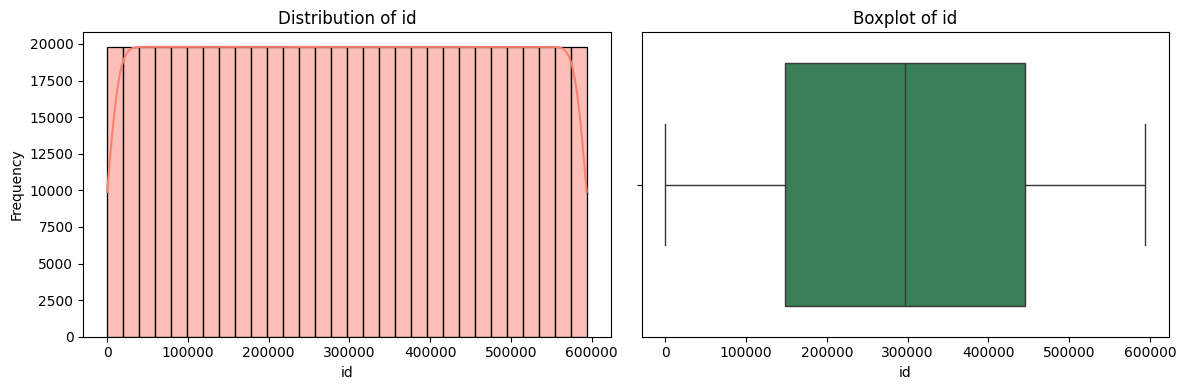


Feature: annual_income
       annual_income
count  593994.000000
mean    48212.202976
std     26711.942078
min      6002.430000
25%     27934.400000
50%     46557.680000
75%     60981.320000
max    393381.740000
Missing values: 0 (0.00%)
Unique values: 119728

Skewness: 1.720
Kurtosis: 7.091

Outliers detected: 15917 (2.68%)
Outlier range: below -21635.98 or above 110551.70

annual_income is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
annual_income shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

The variable is both skewed and heavy-tailed — consider transformation and outlier capping.
 Saved plot for 'annual_income' → EDA_Charts\annual_income_univariate_plot.png


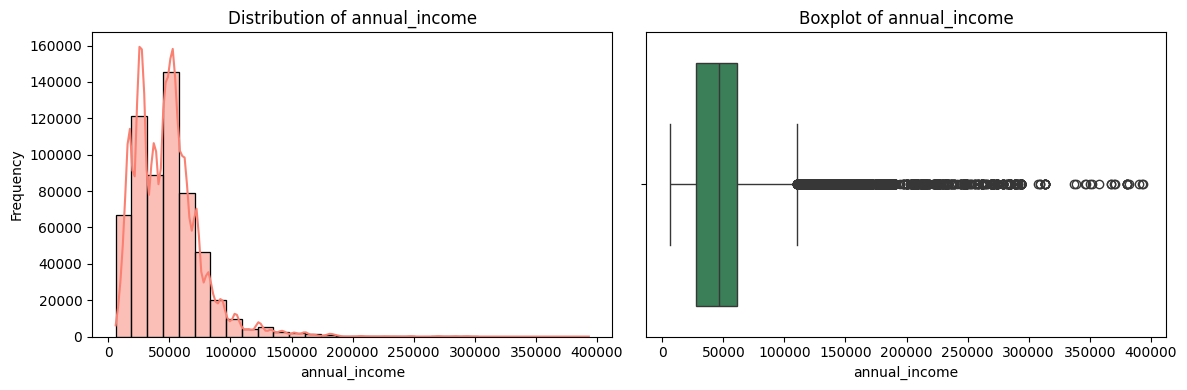


Feature: debt_to_income_ratio
       debt_to_income_ratio
count         593994.000000
mean               0.120696
std                0.068573
min                0.011000
25%                0.072000
50%                0.096000
75%                0.156000
max                0.627000
Missing values: 0 (0.00%)
Unique values: 526

Skewness: 1.407
Kurtosis: 2.335

Outliers detected: 17556 (2.96%)
Outlier range: below -0.05 or above 0.28

debt_to_income_ratio is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
debt_to_income_ratio shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

The variable is both skewed and heavy-tailed — consider transformation and outlier capping.
 Saved plot for 'debt_to_income_ratio' → EDA_Charts\debt_to_income_ratio_univariate_plot.png


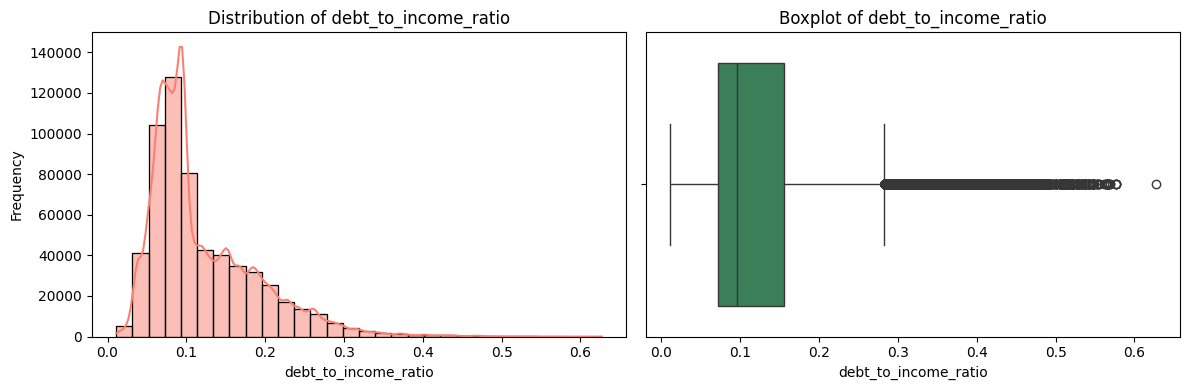


Feature: credit_score
        credit_score
count  593994.000000
mean      680.916009
std        55.424956
min       395.000000
25%       646.000000
50%       682.000000
75%       719.000000
max       849.000000
Missing values: 0 (0.00%)
Unique values: 399

Skewness: -0.167
Kurtosis: 0.096

Outliers detected: 5901 (0.99%)
Outlier range: below 536.50 or above 828.50
credit_score is fairly symmetric — no transformation likely needed.
credit_score has fairly normal kurtosis — suitable for most ML models.

The variable is approximately normal — no transformation needed.
 Saved plot for 'credit_score' → EDA_Charts\credit_score_univariate_plot.png


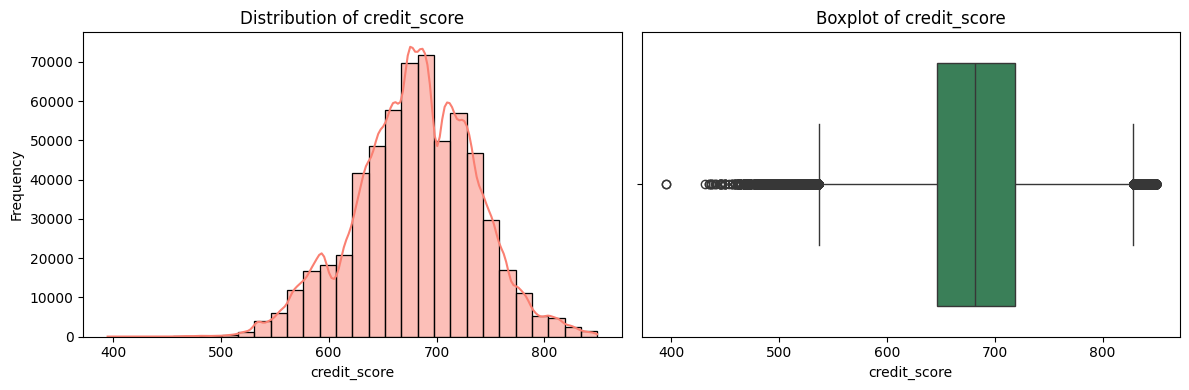


Feature: loan_amount
         loan_amount
count  593994.000000
mean    15020.297629
std      6926.530568
min       500.090000
25%     10279.620000
50%     15000.220000
75%     18858.580000
max     48959.950000
Missing values: 0 (0.00%)
Unique values: 111570

Skewness: 0.207
Kurtosis: -0.150

Outliers detected: 2902 (0.49%)
Outlier range: below -2588.82 or above 31727.02
loan_amount is fairly symmetric — no transformation likely needed.
loan_amount has fairly normal kurtosis — suitable for most ML models.

The variable is approximately normal — no transformation needed.
 Saved plot for 'loan_amount' → EDA_Charts\loan_amount_univariate_plot.png


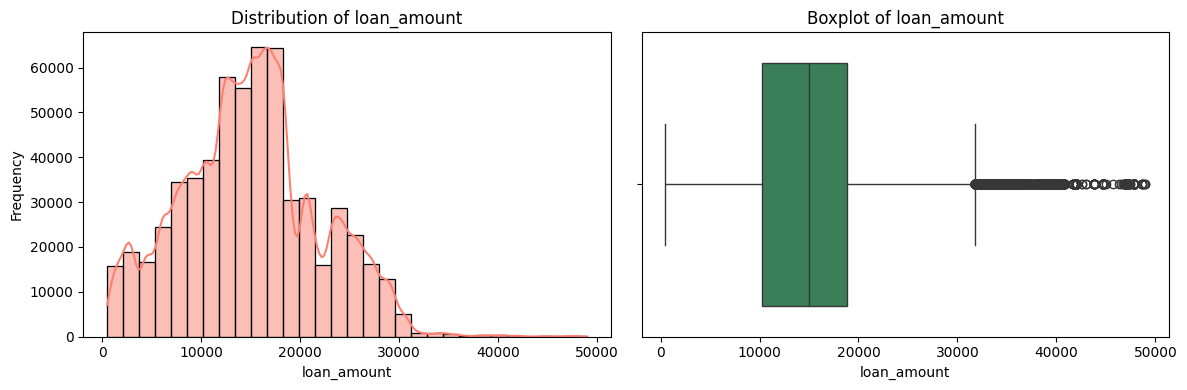


Feature: interest_rate
       interest_rate
count  593994.000000
mean       12.356345
std         2.008959
min         3.200000
25%        10.990000
50%        12.370000
75%        13.680000
max        20.990000
Missing values: 0 (0.00%)
Unique values: 1454

Skewness: 0.050
Kurtosis: 0.060

Outliers detected: 5136 (0.86%)
Outlier range: below 6.96 or above 17.71
interest_rate is fairly symmetric — no transformation likely needed.
interest_rate has fairly normal kurtosis — suitable for most ML models.

The variable is approximately normal — no transformation needed.
 Saved plot for 'interest_rate' → EDA_Charts\interest_rate_univariate_plot.png


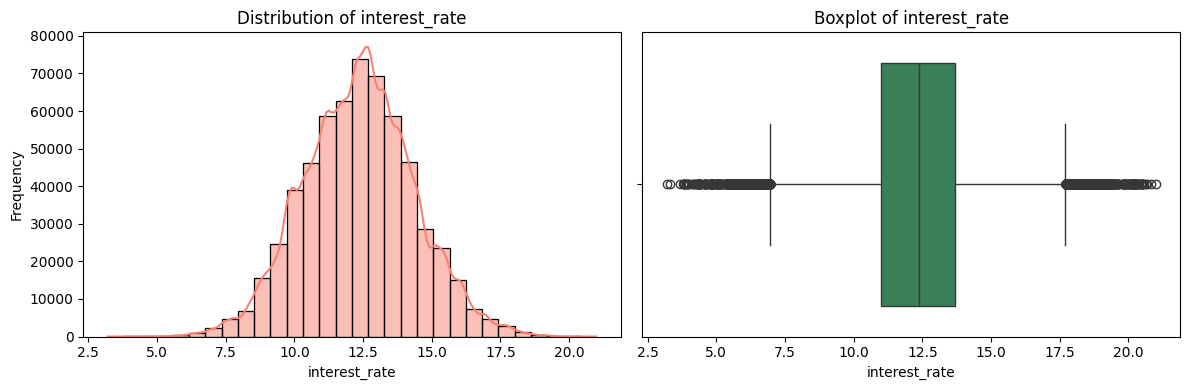


Feature: loan_paid_back
       loan_paid_back
count   593994.000000
mean         0.798820
std          0.400883
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Missing values: 0 (0.00%)
Unique values: 2

Skewness: -1.491
Kurtosis: 0.223

Outliers detected: 119500 (20.12%)
Outlier range: below 1.00 or above 1.00

loan_paid_back is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
loan_paid_back has fairly normal kurtosis — suitable for most ML models.

Focus on correcting skew (e.g., log-transform); no heavy outlier correction needed.
 Saved plot for 'loan_paid_back' → EDA_Charts\loan_paid_back_univariate_plot.png


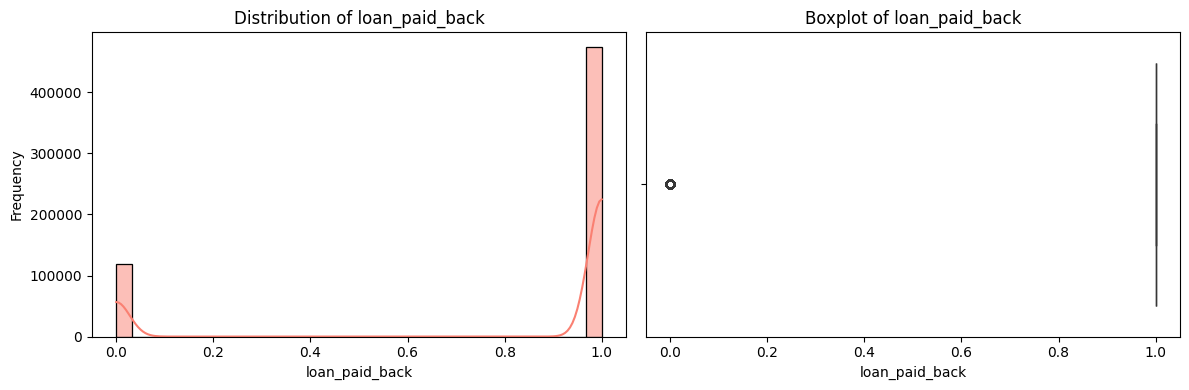

In [7]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    univariate_numerical_eda(df, col)

In [8]:
def univariate_categorical_eda(df, column, save_folder="EDA_Categorical_Charts"):
    """
    Performs univariate EDA on a single categorical column.
    Displays frequency distribution, proportion, missing values,
    and visualizations (bar plot + pie chart).
    Automatically saves each plot to a folder.
    Provides ML preprocessing suggestions.
    """

    # Create folder if it doesn’t exist
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    print(f"\nFeature: {column}")
    print("="*45)

    # --- Summary ---
    total = len(df[column])
    missing = df[column].isna().sum()
    unique = df[column].nunique()
    mode_val = df[column].mode()[0] if unique > 0 else None

    print(f"Total observations: {total}")
    print(f"Missing values: {missing} ({(missing/total)*100:.2f}%)")
    print(f"Unique categories: {unique}")
    print(f"Most frequent category: {mode_val}")

    # --- Frequency Table ---
    freq = df[column].value_counts(dropna=False)
    perc = df[column].value_counts(normalize=True, dropna=False) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': perc.round(2)})
    print("\nCategory Distribution:")
    print(summary)

    # --- Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Bar Plot
    sns.countplot(x=df[column], palette='Set2', order=freq.index, ax=axes[0])
    axes[0].set_title(f"Frequency of {column}", fontsize=13)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x', rotation=30)

    # Pie Chart
    axes[1].pie(freq, labels=freq.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f"Proportion of {column}", fontsize=13)

    plt.tight_layout()

    # --- Save Chart ---
    save_path = os.path.join(save_folder, f"{column}_categorical_plot.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    print(f"Saved plot for '{column}' → {save_path}")

    # Optional: show inline
    plt.show()

    plt.close(fig)

    # --- ML Preprocessing Suggestions ---
    if unique == 2:
        print(f" {column} is binary — suitable for Label Encoding (0/1).")
    elif 2 < unique <= 10:
        print(f" {column} has moderate categories — use One-Hot Encoding.")
    elif unique > 10:
        print(f" {column} has many unique categories — consider frequency encoding or feature grouping.")
    else:
        print(f" {column} seems low cardinality — standard encoding should work fine.")

    if (missing / total) > 0.05:
        print(f" Missing values exceed 5% — consider imputing or flagging missingness.")



Feature: gender
Total observations: 593994
Missing values: 0 (0.00%)
Unique categories: 3
Most frequent category: Female

Category Distribution:
         Count  Percentage
gender                    
Female  306175       51.55
Male    284091       47.83
Other     3728        0.63


C:\Users\USER\AppData\Local\Temp\ipykernel_6680\253246000.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set2', order=freq.index, ax=axes[0])


Saved plot for 'gender' → EDA_Categorical_Charts\gender_categorical_plot.png


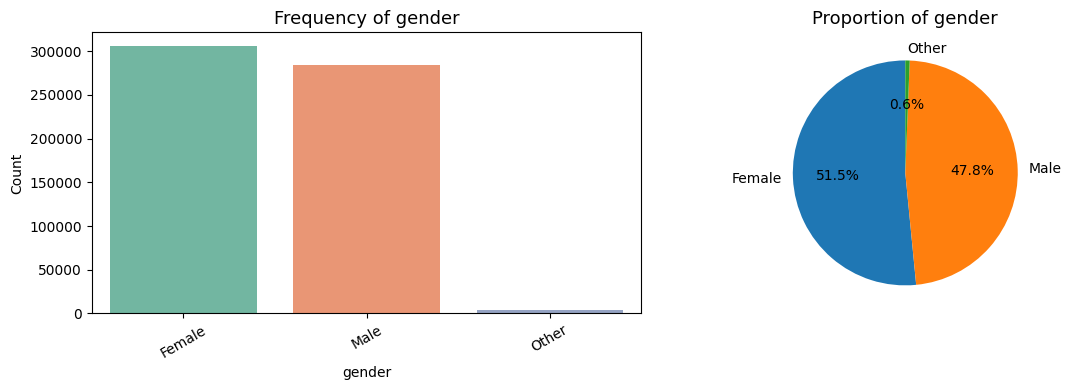

 gender has moderate categories — use One-Hot Encoding.

Feature: marital_status
Total observations: 593994
Missing values: 0 (0.00%)
Unique categories: 4
Most frequent category: Single

Category Distribution:
                 Count  Percentage
marital_status                    
Single          288843       48.63
Married         277239       46.67
Divorced         21312        3.59
Widowed           6600        1.11


C:\Users\USER\AppData\Local\Temp\ipykernel_6680\253246000.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set2', order=freq.index, ax=axes[0])


Saved plot for 'marital_status' → EDA_Categorical_Charts\marital_status_categorical_plot.png


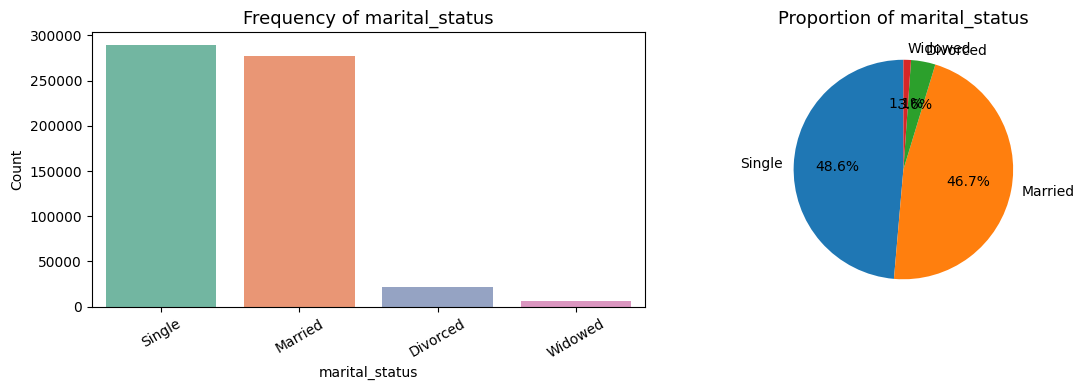

 marital_status has moderate categories — use One-Hot Encoding.

Feature: education_level
Total observations: 593994
Missing values: 0 (0.00%)
Unique categories: 5
Most frequent category: Bachelor's

Category Distribution:
                  Count  Percentage
education_level                    
Bachelor's       279606       47.07
High School      183592       30.91
Master's          93097       15.67
Other             26677        4.49
PhD               11022        1.86


C:\Users\USER\AppData\Local\Temp\ipykernel_6680\253246000.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set2', order=freq.index, ax=axes[0])


Saved plot for 'education_level' → EDA_Categorical_Charts\education_level_categorical_plot.png


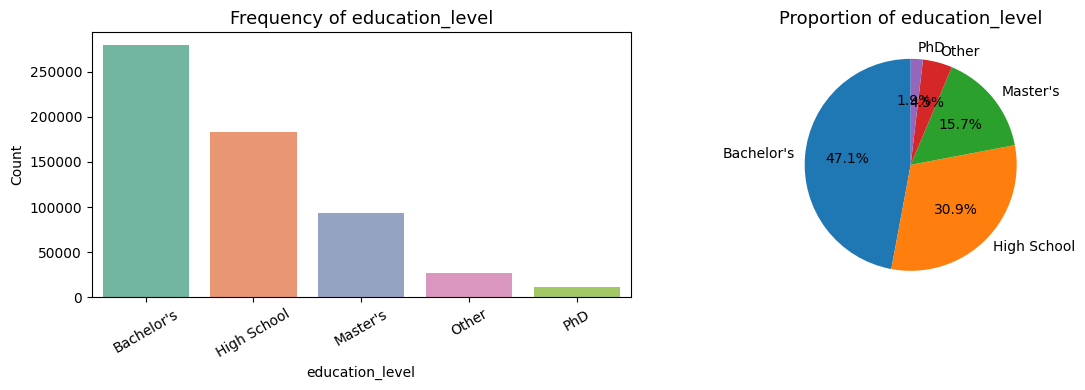

 education_level has moderate categories — use One-Hot Encoding.

Feature: employment_status
Total observations: 593994
Missing values: 0 (0.00%)
Unique categories: 5
Most frequent category: Employed

Category Distribution:
                    Count  Percentage
employment_status                    
Employed           450645       75.87
Unemployed          62485       10.52
Self-employed       52480        8.84
Retired             16453        2.77
Student             11931        2.01


C:\Users\USER\AppData\Local\Temp\ipykernel_6680\253246000.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set2', order=freq.index, ax=axes[0])


Saved plot for 'employment_status' → EDA_Categorical_Charts\employment_status_categorical_plot.png


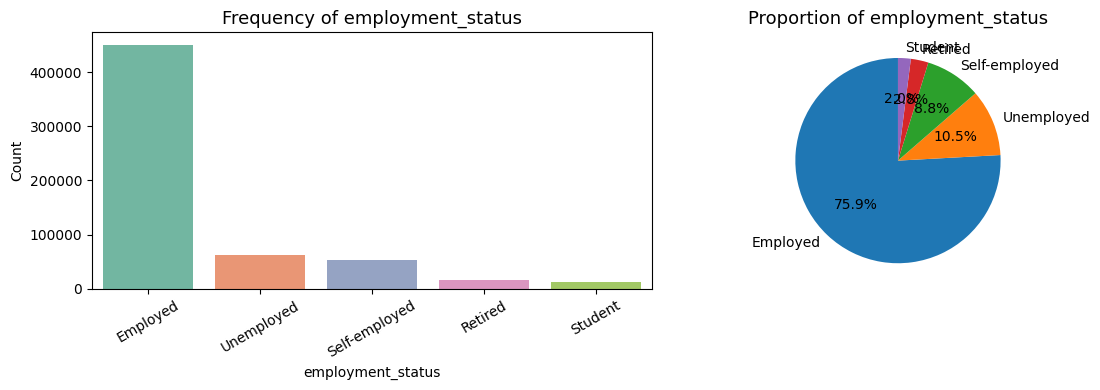

 employment_status has moderate categories — use One-Hot Encoding.

Feature: loan_purpose
Total observations: 593994
Missing values: 0 (0.00%)
Unique categories: 8
Most frequent category: Debt consolidation

Category Distribution:
                     Count  Percentage
loan_purpose                          
Debt consolidation  324695       54.66
Other                63874       10.75
Car                  58108        9.78
Home                 44118        7.43
Education            36641        6.17
Business             35303        5.94
Medical              22806        3.84
Vacation              8449        1.42


C:\Users\USER\AppData\Local\Temp\ipykernel_6680\253246000.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set2', order=freq.index, ax=axes[0])


Saved plot for 'loan_purpose' → EDA_Categorical_Charts\loan_purpose_categorical_plot.png


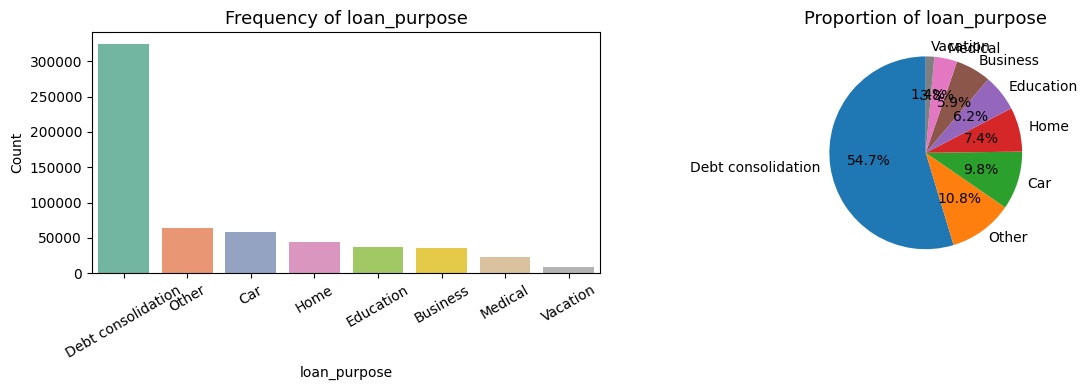

 loan_purpose has moderate categories — use One-Hot Encoding.

Feature: grade_subgrade
Total observations: 593994
Missing values: 0 (0.00%)
Unique categories: 30
Most frequent category: C3

Category Distribution:
                Count  Percentage
grade_subgrade                   
C3              58695        9.88
C4              55957        9.42
C2              54443        9.17
C1              53363        8.98
C5              53317        8.98
D1              37029        6.23
D3              36694        6.18
D4              35097        5.91
D2              34432        5.80
D5              32101        5.40
B2              15167        2.55
B1              14344        2.41
B5              13937        2.35
B3              13926        2.34
B4              13877        2.34
E4               8036        1.35
E3               7075        1.19
E1               6891        1.16
E2               6372        1.07
E5               6084        1.02
F5               5947        1.00
F4   

C:\Users\USER\AppData\Local\Temp\ipykernel_6680\253246000.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='Set2', order=freq.index, ax=axes[0])


Saved plot for 'grade_subgrade' → EDA_Categorical_Charts\grade_subgrade_categorical_plot.png


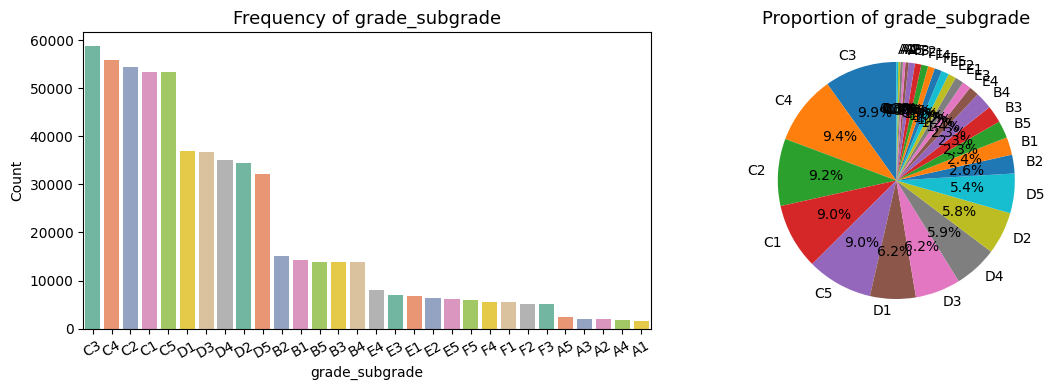

 grade_subgrade has many unique categories — consider frequency encoding or feature grouping.


In [9]:
# We can loop to save time
for col in df.select_dtypes(include=['object']).columns.tolist():
    univariate_categorical_eda(df, col)

----------------------------------------------------------------
 ### **2. Bivariate analysis**
 ---------------------------------------------------------------

In [10]:
# Lets find the numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# convert to dataframe
num_features = pd.DataFrame(df[num_features])
num_features.head(2)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,1.0
1,1,22108.02,0.166,636,4593.10,12.92,0.0


In [11]:
def correlation_with_target(df, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    #numeric_df = df1.select_dtypes(include='number').copy()
    #numeric_df = df1.select_dtypes(include=['int64', 'float64']).columns
    #num_features
    if target_col not in num_features.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = num_features.corrwith(num_features[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)
    

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)


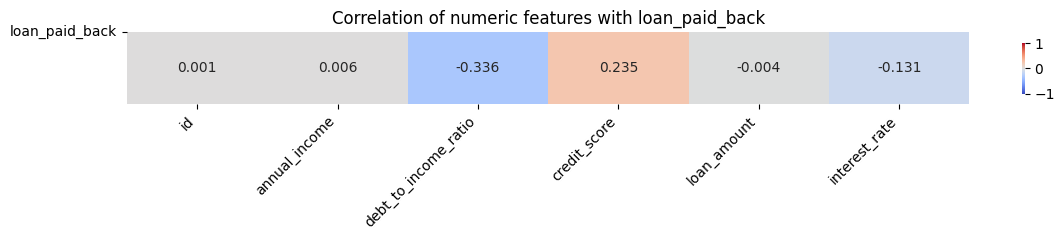

debt_to_income_ratio   -0.335680
credit_score            0.234560
interest_rate          -0.131184
annual_income           0.006326
loan_amount            -0.003762
id                      0.001387
dtype: float64


In [12]:
corr_series = correlation_with_target(df, 'loan_paid_back', figsize=(12,2.5))
print(corr_series) 

Correlation Insights

The debt-to-income ratio shows the strongest relationship with the target variable, and it’s negative. This suggests that as borrowers’ debt relative to income increases, their likelihood of a positive loan outcome decreases.

Credit score has a moderate positive correlation, meaning borrowers with higher credit scores tend to perform better on their loans.

The interest rate shows a weak negative correlation, which makes sense higher interest rates usually signal higher risk, and those borrowers are slightly less likely to do well.

Annual income and loan amount have almost no meaningful correlation with the target, indicating these variables alone don’t strongly influence loan outcomes in this dataset.

The id column also shows no real relationship, as expected. it’s just an identifier.

Overall, the debt-to-income ratio and credit score appear to be the most influential factors among the numerical features.

**Numeric–Categorical (Feature vs Target)**

In [13]:
def bivariate_num_cat(df, feature, target='case_status'):
    """
    Plots and summarizes relationship between a numerical feature and a categorical target.
    """
    print(f" Feature: {feature} vs {target}")
    print("="*50)

    # Group summary
    summary = df.groupby(target)[feature].describe()[['mean','std','min','max']]
    print(summary)
    print()

    plt.figure(figsize=(10,5))

    # Boxplot + mean line
    sns.boxplot(x=target, y=feature, data=df, palette='Set2')
    plt.title(f'{feature} across {target} categories', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    #plt.show()


 Feature: debt_to_income_ratio vs loan_paid_back
                    mean       std    min    max
loan_paid_back                                  
0.0             0.166564  0.083245  0.011  0.627
1.0             0.109144  0.058975  0.011  0.577



C:\Users\USER\AppData\Local\Temp\ipykernel_6680\2349477395.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


 Feature: credit_score vs loan_paid_back
                      mean        std    min    max
loan_paid_back                                     
0.0             655.010628  51.680938  395.0  849.0
1.0             687.440208  54.418255  395.0  849.0



C:\Users\USER\AppData\Local\Temp\ipykernel_6680\2349477395.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


 Feature: annual_income vs loan_paid_back
                        mean           std      min        max
loan_paid_back                                                
0.0             47875.503881  27199.060946  6098.80  393381.74
1.0             48296.999711  26587.212646  6002.43  393064.03



C:\Users\USER\AppData\Local\Temp\ipykernel_6680\2349477395.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


 Feature: loan_amount vs loan_paid_back
                        mean          std     min       max
loan_paid_back                                             
0.0             15072.223883  6945.374637  507.42  48959.95
1.0             15007.220145  6921.722581  500.09  48954.70



C:\Users\USER\AppData\Local\Temp\ipykernel_6680\2349477395.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


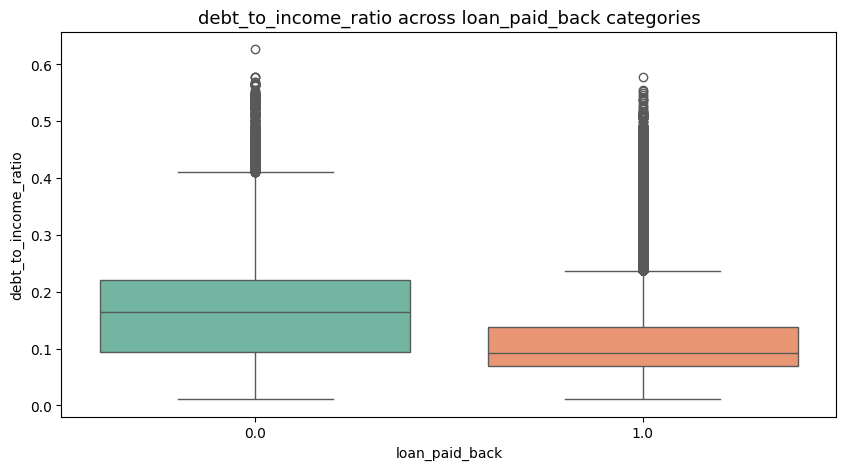

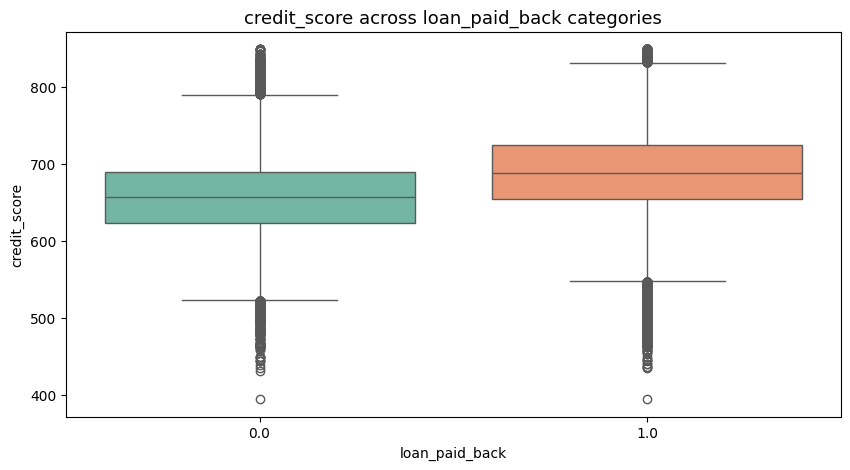

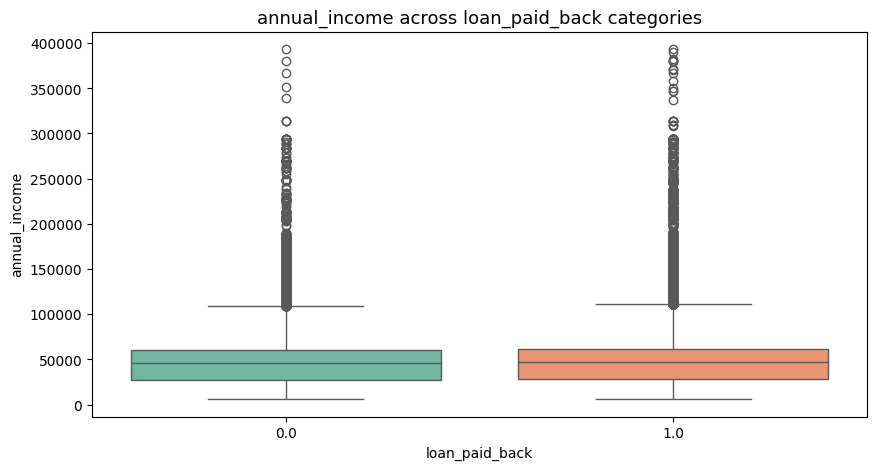

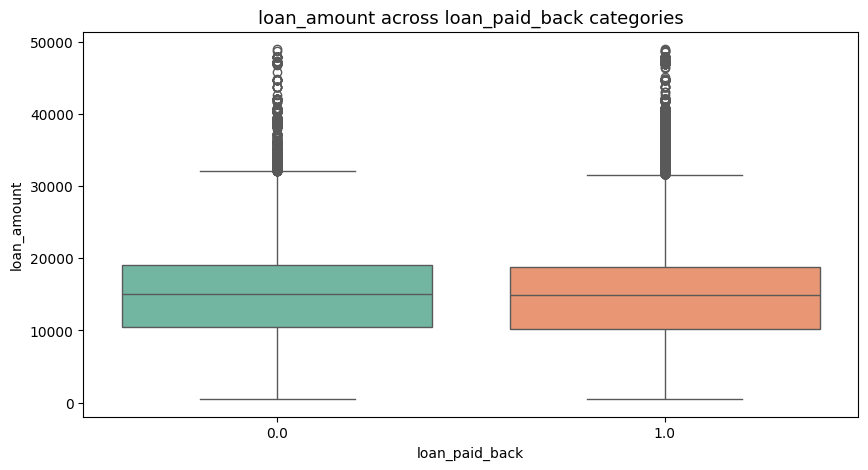

In [14]:
bivariate_num_cat(df, "debt_to_income_ratio", target='loan_paid_back')
bivariate_num_cat(df, "credit_score", target='loan_paid_back')
bivariate_num_cat(df, "annual_income", target='loan_paid_back')
bivariate_num_cat(df, "loan_amount", target='loan_paid_back')

Debt-to-Income Ratio vs Loan Repayment

Borrowers who did not pay back their loans (0) have a higher average debt-to-income ratio (0.1666) compared to those who successfully repaid (1), who average 0.1091. This means that, on average, unsuccessful borrowers carry more debt relative to their income, making repayment harder.

The standard deviation is also slightly higher in the non-repayment group, suggesting more variability and a wider range of financial strain. While both groups share similar minimum and maximum values, the overall trend is clear: higher debt burden is associated with a greater risk of loan default.

This confirms debt-to-income ratio as an important predictor of loan repayment behavior.

Credit Score vs Loan Repayment

Borrowers who paid back their loans (1) have a noticeably higher average credit score (687.44) compared to those who did not repay (0), who average 655.01. This gap suggests that individuals with stronger credit histories are more reliable in meeting loan obligations.

Both groups have similar score ranges (395–849), but the difference in their averages highlights a clear trend:
Higher credit scores are associated with better repayment behavior.

The slightly higher standard deviation in the repayment group shows a bit more spread, but overall, credit score remains a strong and meaningful predictor of loan performance.

Annual Income vs Loan Repayment

The average annual income of borrowers who did not repay (0) and those who did repay (1) is almost the same: about $47,876 versus $48,297. This very small difference suggests that income alone does not strongly distinguish reliable borrowers from risky ones in this dataset.

Both groups also show large variability (high standard deviation) and nearly identical minimum and maximum incomes. This indicates that borrowers across the entire income spectrum low, middle, and high earners can be found in both repayment outcomes.

Overall, annual income is not a meaningful predictor of loan repayment compared to stronger indicators like debt-to-income ratio and credit score.

Loan Amount vs Loan Repayment

The average loan amount for borrowers who did not repay (0) and those who did repay (1) is almost identical: about $15,072 vs $15,007. The standard deviations and value ranges are also nearly the same.

This tells us that the size of the loan does not meaningfully differentiate between borrowers who default and those who successfully repay. Small and large loans appear in both outcome groups.

Overall, loan amount is not a useful predictor of repayment behavior in this dataset, unlike stronger factors such as credit score or debt-to-income ratio.

In [19]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(df, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """

    # Calculate correlation coefficient
    corr, p_value = pearsonr(df[x_col], df[y_col])

    # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    #plt.show()


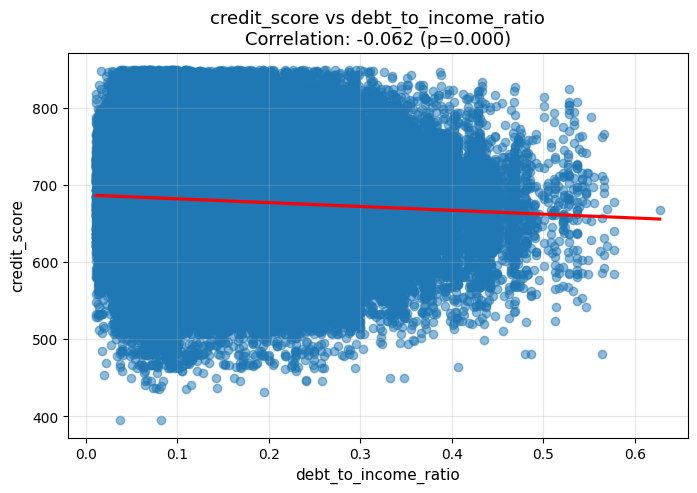

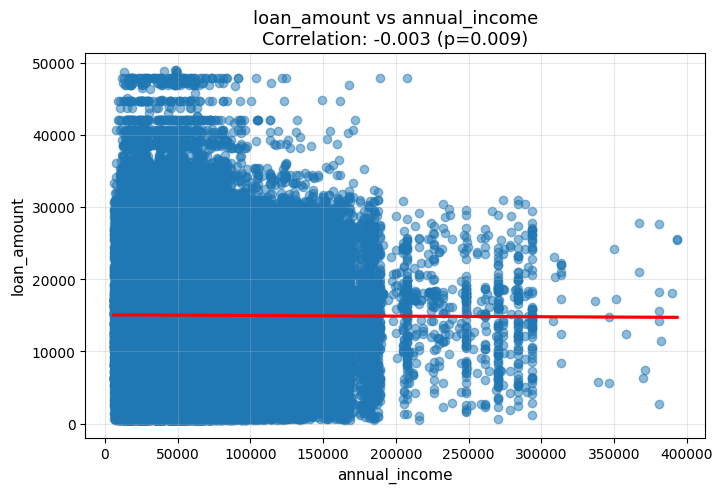

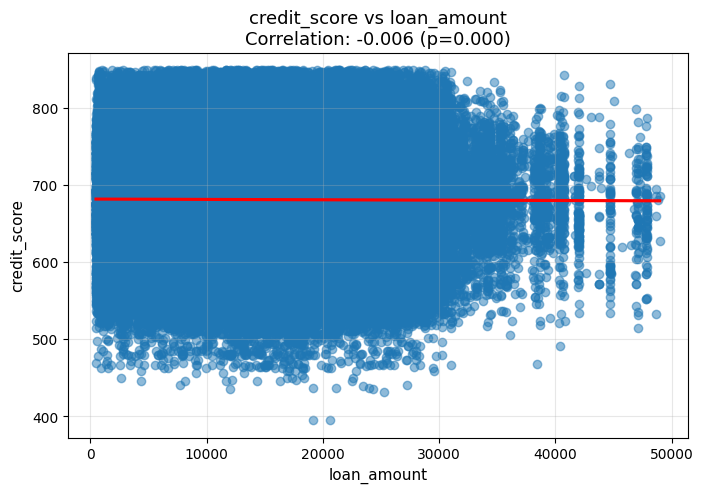

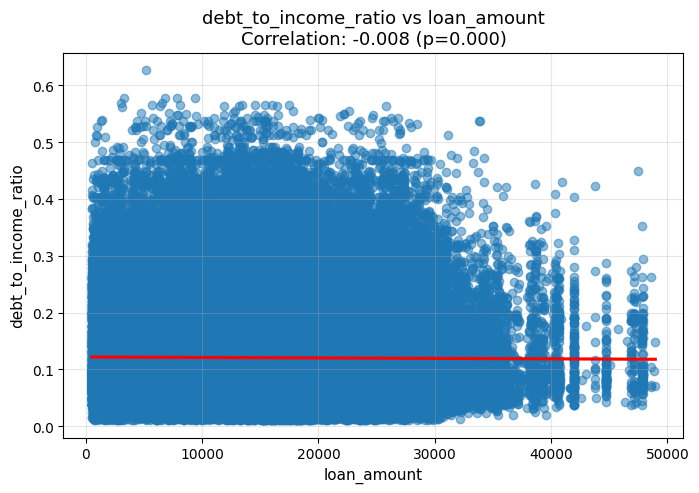

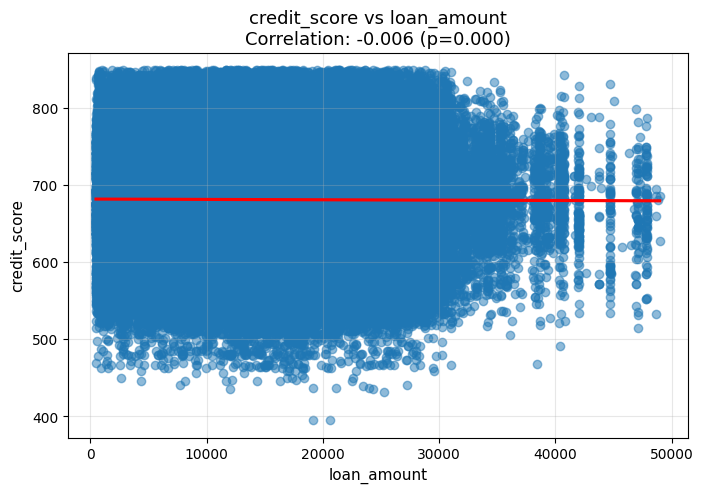

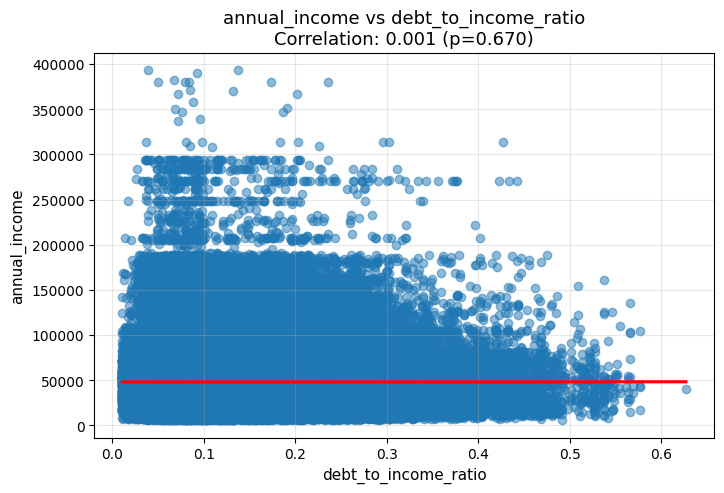

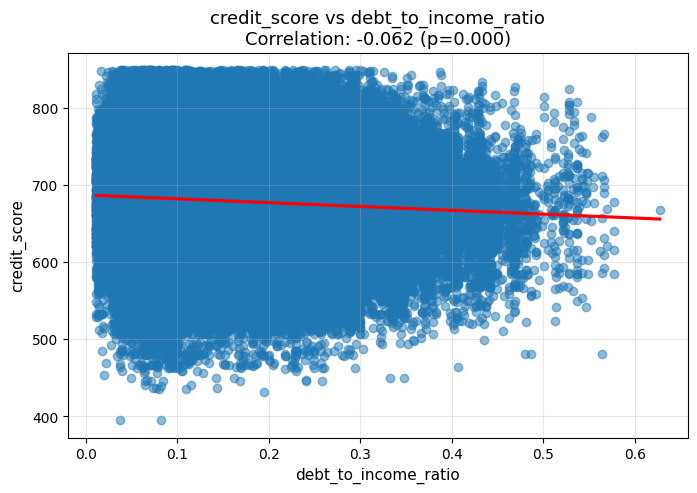

In [20]:
numeric_bivariate_plot(df, "debt_to_income_ratio", 'credit_score')
numeric_bivariate_plot(df, "annual_income", 'loan_amount')
numeric_bivariate_plot(df, "loan_amount", 'credit_score')
numeric_bivariate_plot(df, "loan_amount", 'debt_to_income_ratio')
numeric_bivariate_plot(df, "loan_amount",'credit_score')
numeric_bivariate_plot(df, "debt_to_income_ratio", 'annual_income')
numeric_bivariate_plot(df, "debt_to_income_ratio", 'credit_score')

 ###  Trivariate analysis

In [21]:
def trivariate_plot(df, x_col, y_col, hue_col):
    """
    Visualizes the relationship between two numeric variables
    with a third categorical variable shown by color (hue).
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataset.
    x_col : str
        The first numeric feature (x-axis).
    y_col : str
        The second numeric feature (y-axis).
    hue_col : str
        The categorical feature (color grouping).
    """

    plt.figure(figsize=(8, 6))
    sns.lmplot(
        data=df, 
        x=x_col, 
        y=y_col, 
        hue=hue_col, 
        height=6, 
        aspect=1.2, 
        scatter_kws={'alpha':0.6}, 
        line_kws={'linewidth':2}
    )
    plt.title(f"{y_col} vs {x_col} by {hue_col}", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    #plt.show()


<Figure size 800x600 with 0 Axes>

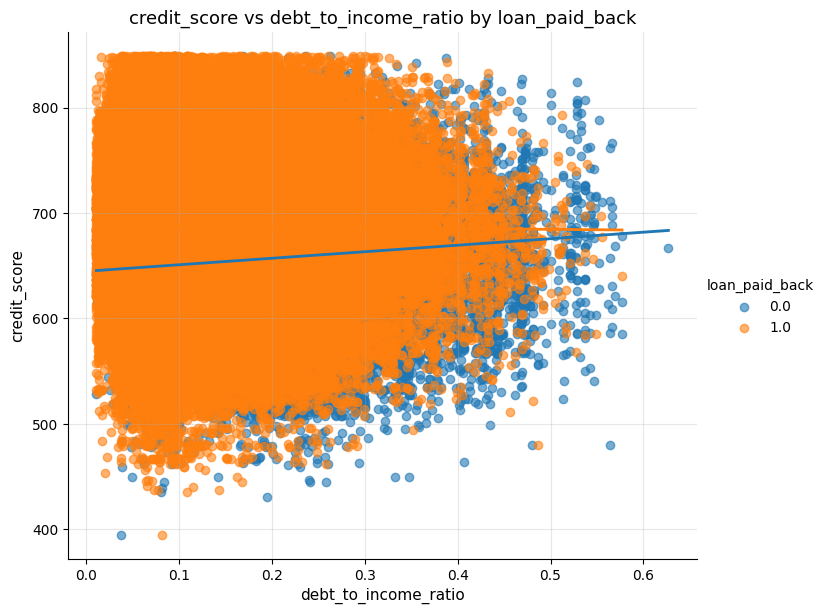

<Figure size 800x600 with 0 Axes>

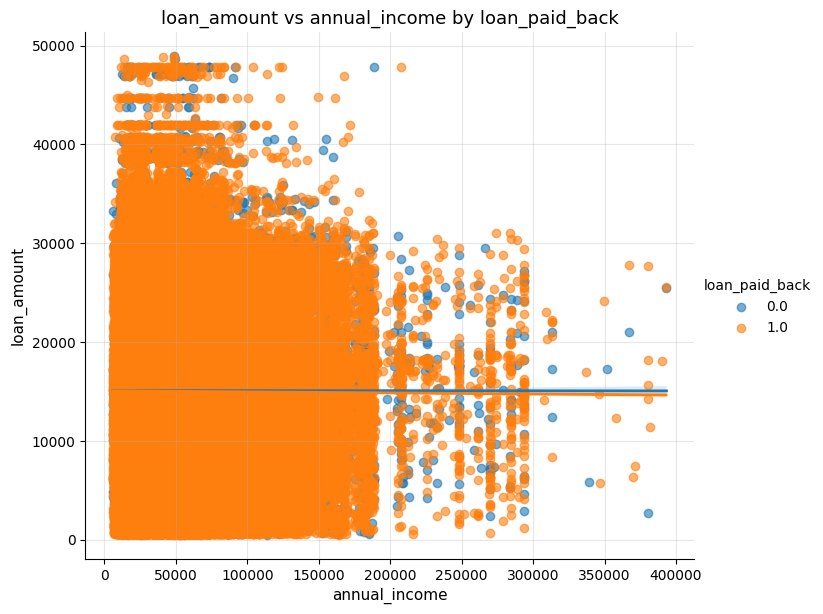

<Figure size 800x600 with 0 Axes>

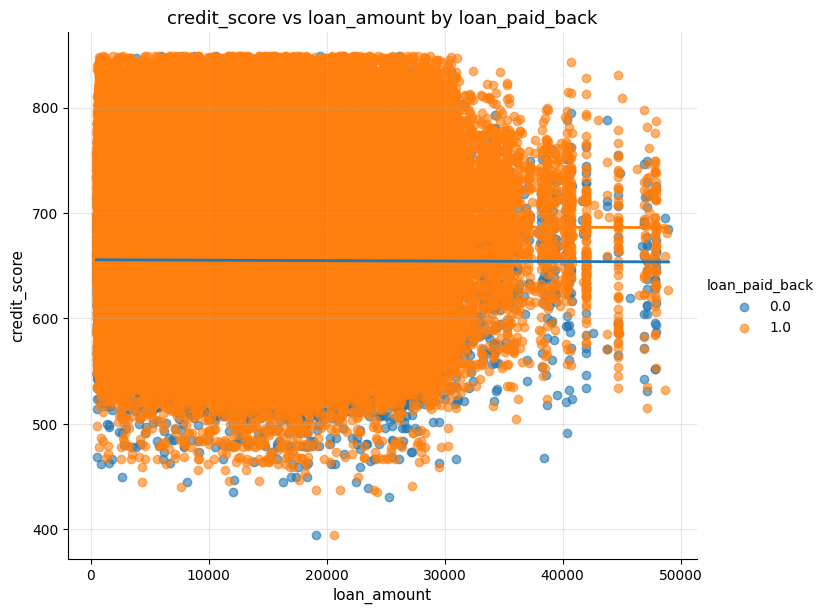

<Figure size 800x600 with 0 Axes>

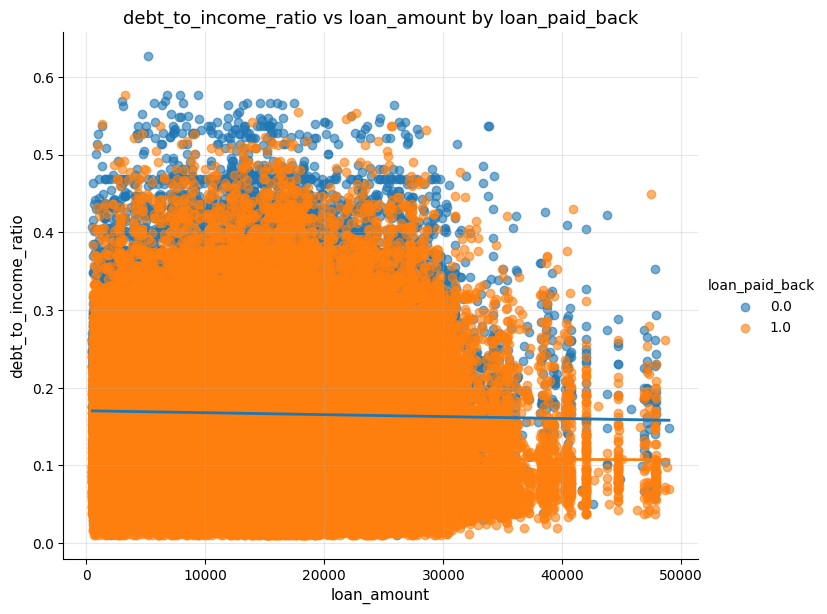

In [22]:
trivariate_plot(df, "debt_to_income_ratio", 'credit_score', 'loan_paid_back')
trivariate_plot(df, "annual_income", 'loan_amount', 'loan_paid_back')
trivariate_plot(df, "loan_amount", 'credit_score', 'loan_paid_back')
trivariate_plot(df, "loan_amount", 'debt_to_income_ratio', 'loan_paid_back')



In [26]:
def grouped_summary(df):
    """
    Computes summary statistics grouped by case_status.
    """
    summary = df.groupby('loan_paid_back').mean(numeric_only=True).round(2)
    return summary


In [27]:
grouped_summary(num_features)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate
loan_paid_back,,,,,,
0.0,296522.44,47875.5,0.17,655.01,15072.22,12.88
1.0,297115.89,48297.0,0.11,687.44,15007.22,12.22


Debt-to-income ratio is noticeably higher among non-repayers (0.17 vs 0.11). This indicates that borrowers with heavier debt burdens struggle more with repayment.

Credit scores are significantly lower for non-repayers (655 vs 687), reinforcing that credit history is a strong indicator of repayment reliability.

Interest rates are slightly higher for those who default (12.88% vs 12.22%), consistent with lenders charging higher rates to riskier borrowers.

Annual income and loan amount are almost identical between the two groups, showing that these factors alone do not explain repayment behavior.

Overall, the strongest signals of repayment in this dataset are debt-to-income ratio, credit score, and interest rate, while income and loan size play a minimal role.

In [28]:
from scipy.stats import mannwhitneyu

def numeric_feature_selection(df):
    print("=== Mann–Whitney U Test for Numeric Features ===")
    numeric_features = ['id', 'annual_income', 'debt_to_income_ratio', 'credit_score', 
    'loan_amount', 'interest_rate', 'loan_paid_back']
    results = []

    for feature in numeric_features:
        if feature in df.columns:
            yes = df[df['loan_paid_back'] == 1][feature]
            no = df[df['loan_paid_back'] == 0][feature]

            stat, p = mannwhitneyu(yes, no, alternative='two-sided')
            results.append({'Feature': feature, 'p-value': p})
            print(f"{feature}: p = {p:.4f} {'(Significant)' if p < 0.05 else '(Not significant)'}")

    return pd.DataFrame(results)


In [29]:
from scipy.stats import chi2_contingency

def categorical_feature_selection(df):
    print("\n=== Chi-square Test for Categorical Features ===")
    categorical_features = ['gender', 'marital_status', 'education_level', 'employment_status',
     'loan_purpose', 'grade_subgrade']
    results = []

    for feature in categorical_features:
        if feature in df.columns:
            contingency_table = pd.crosstab(df[feature], df['loan_paid_back'])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            results.append({'Feature': feature, 'p-value': p})
            print(f"{feature}: p = {p:.4f} {'(Significant)' if p < 0.05 else '(Not significant)'}")

    return pd.DataFrame(results)


In [30]:
num_results = numeric_feature_selection(df)
cat_results = categorical_feature_selection(df)

final_results = pd.concat([num_results, cat_results], ignore_index=True)
final_results = final_results.sort_values(by='p-value')
print("\n=== Summary of Feature Significance ===")
print(final_results)

=== Mann–Whitney U Test for Numeric Features ===
id: p = 0.2849 (Not significant)
annual_income: p = 0.0000 (Significant)
debt_to_income_ratio: p = 0.0000 (Significant)
credit_score: p = 0.0000 (Significant)
loan_amount: p = 0.0000 (Significant)
interest_rate: p = 0.0000 (Significant)
loan_paid_back: p = 0.0000 (Significant)

=== Chi-square Test for Categorical Features ===
gender: p = 0.0000 (Significant)
marital_status: p = 0.2486 (Not significant)
education_level: p = 0.0000 (Significant)
employment_status: p = 0.0000 (Significant)
loan_purpose: p = 0.0000 (Significant)
grade_subgrade: p = 0.0000 (Significant)

=== Summary of Feature Significance ===
                 Feature       p-value
3           credit_score  0.000000e+00
2   debt_to_income_ratio  0.000000e+00
6         loan_paid_back  0.000000e+00
5          interest_rate  0.000000e+00
12        grade_subgrade  0.000000e+00
10     employment_status  0.000000e+00
9        education_level  1.055186e-81
11          loan_purpose  

#### Numeric Features (Mann–Whitney U Test)


Most numeric features show significant differences between the two groups:

Annual income, debt-to-income ratio, credit score, loan amount, interest rate, and loan_paid_back all have p-values of 0.0000, meaning the differences are statistically meaningful.

The only exception is ID, which correctly shows no significance, since it’s just an identifier with no predictive value.

This confirms that financial behavior and loan conditions differ between repayers and non-repayers, especially credit score and debt-to-income ratio, which were also strong in earlier correlation analysis.

#### Categorical Features (Chi-square Test)

Several categorical variables also show significant influence:

Gender, education level, employment status, loan purpose, and grade_subgrade all significantly differ between repayment groups.
These features likely capture behavioral, socioeconomic, or risk-related patterns.

Marital status, however, is not significant, meaning repayment does not meaningfully vary across single, married, divorced, or widowed individuals.

#### Most Influential Features

The top significant features are:

Credit score

Debt-to-income ratio

Loan repayment indicator (loan_paid_back)

These findings align well with loan industry expectations: financial stability and creditworthiness are the strongest predictors of repayment.